In [1]:
# This quickly generates a FlareLightCurve
from altaipony.tests.test_flarelc import mock_flc

#Alternatively, use
from altaipony.flarelc import FlareLightCurve

# We shall be testing our code
import pytest 

# The basis
import numpy as np
import pandas as pd

# For plotting diagnostics
import matplotlib.pyplot as plt
%matplotlib inline

# Import our main class
from flarefairy import FlareFairy

/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [ ]:
# Q-learning parameters that are fixed ad hoc
DISCRETE_OS_SIZE = [20, 20]
LEARNING_RATE = .5
DISCOUNT = .75

In [52]:
# Let's generate a flare light curve to work with

# small size to keep computational effort at bay
n = 300

# time, flux noise
time = np.linspace(20,22,n)
flux = 500. + 15.* np.sin(time*2)
flux_err = flux * .0005

# a hand-crafted flare signal
flux[60] = 730
flux[61] = 600
flux[62] = 560
flux[63] = 530
flux[64] = 525
flux[65] = 520
flux[66] = 515
flux[67] = 510

# define FlareLightCurve object
flc = FlareLightCurve(time=time, flux=flux, flux_err=flux_err)

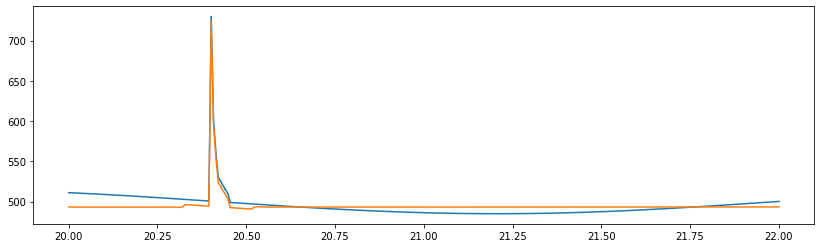

In [53]:
# get de-trended light curve (useful for later)
flcd = flc.detrend("savgol")

# look at the result
plt.figure(figsize=(14,4))
plt.errorbar(flcd.time, flcd.flux, yerr=flcd.flux_err, label="before de-trending");
plt.errorbar(flcd.time, flcd.detrended_flux, yerr=flcd.detrended_flux_err, label="after de-trending");

In [56]:
# Find the flare wi
flare = flcd.find_flares().flares.iloc[0]

Found 1 candidate(s) in the (0,300) gap.


istart                             49
istop                              68
cstart                            NaN
cstop                             NaN
tstart                        20.3278
tstop                         20.4548
ed_rec                        603.787
ed_rec_err                   0.574768
ampl_rec                     0.466899
dur                           0.12709
total_n_valid_data_points         300
Name: 0, dtype: object